In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

data = pd.read_csv('labeled.csv', names=['무릎높이', '엉덩이너비', '앉은키', '앉은무릎', '앉은오금', '앉은무릎수평', '오금수평', 'Class'])
X = data.iloc[:, 0:7]
y = data.Class

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
# Generate and fit Decision Tree Classifier
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0, max_leaf_nodes=3)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [22]:
from sklearn.metrics import accuracy_score

# Accuracy score
y_pred_tr = DT.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.92


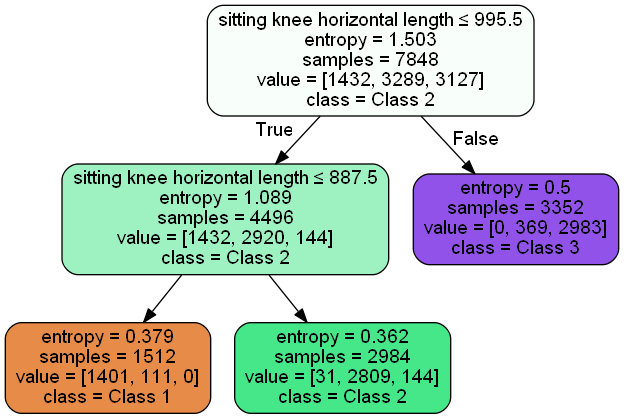

In [23]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Plotting
featureNames = ['knee height', 'sitting hip breadth', 'sitting height', 'sitting knee height', 'sitting popliteal height', 'sitting knee horizontal length', 'sitting popliteal horizontal length']
classNames = ['Class 1', 'Class 2', 'Class 3']

dot_data_eng = export_graphviz(DT, out_file=None, feature_names=featureNames,
                          class_names=classNames, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data_eng)
Image(graph.create_png())

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data_kor = export_graphviz(DT, out_file=None, feature_names=['무릎높이', '엉덩이너비', '앉은키', '앉은무릎', '앉은오금', '앉은무릎수평', '오금수평'],
                          class_names=classNames, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#graph.write_png('tree.png')